# **DATA UNDERSTANDING**
For this project, you will be working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. Your goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [2]:
path = './dataset/ab_testing_design_ecommerce.csv'
df = pd.read_csv(path)
line = '========================'

In [13]:
def data_statistics(data):
    print('NUMERIC FEATURES')
    display(data.describe([0.05,0.25,0.75,0.95]).T)
    if('object' in data.dtypes.to_list()):
        print('CATEGORICAL FEATURES')
        display(data.describe(include='object').T)

def data_profile(data):
    count_of_duplicate = len(data[data.duplicated()])
    data_size = round(data.memory_usage(deep=True).sum()/1000000, 2)
    data_dimension = data.shape
    dtype = data.dtypes
    count_of_null = data.isna().sum()
    null_ratio = round(count_of_null/len(data), 2)
    count_of_distinct = data.nunique()
    distinct_value = data.apply(lambda x: x.unique())
    output = pd.DataFrame(list(zip(dtype, count_of_null, null_ratio, count_of_distinct, distinct_value)),
                          index=data.columns,
                          columns=['dtype','count_of_null','null_ratio','count_of_distinct','distinct_value'])
    print(f'Dimensions\t: {data_dimension}')
    print(f'Data Size\t: {data_size} MB')
    if count_of_duplicate == 0:
        print(f'Duplicated Data\t: {count_of_duplicate}')
    else:
        print(line)
        print(f'Duplicated Data\t: {count_of_duplicate}')
        display(data[data.duplicated()])
    print(line)
    print('SUMMARY')
    display(output)

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [15]:
data_profile(df)
data_statistics(df)

Dimensions	: (294478, 5)
Data Size	: 67.44 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
user_id,int64,0,0.0,290584,"[851104, 804228, 661590, 853541, 864975, 93692..."
timestamp,object,0,0.0,294478,"[2017-01-21 22:11:48.556739, 2017-01-12 08:01:..."
group,object,0,0.0,2,"[control, treatment]"
landing_page,object,0,0.0,2,"[old_page, new_page]"
converted,int64,0,0.0,2,"[0, 1]"


NUMERIC FEATURES


,count,mean,std,min,5%,25%,50%,75%,95%,max
user_id,294478.0,787974.124733,91210.823776,630000.0,645814.85,709032.25,787933.5,866911.75,930201.15,945999.0
converted,294478.0,0.119659,0.324563,0.0,0.00,0.00,0.0,0.00,1.00,1.0


CATEGORICAL FEATURES


,count,unique,top,freq
timestamp,294478,294478,2017-01-21 22:11:48.556739,1
group,294478,2,treatment,147276
landing_page,294478,2,old_page,147239


There are mismatched which means that treatment group mismatched with old_page and control group mismatched with new_page and duplicated in user_id.

# **DATA CLEANSING**

In [26]:
df[(df.group=='control') & (df.landing_page=='new_page') | (df.group=='treatment') & (df.landing_page=='old_page')]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
...,...,...,...,...,...
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [33]:
df[df.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,treatment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,treatment,old_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


In [34]:
df_clean = df.copy()
df_clean = df[(df.group=='control') & (df.landing_page=='old_page') | (df.group=='treatment') & (df.landing_page=='new_page')]
df_clean = df_clean.drop_duplicates(subset='user_id') 
display(data_profile(df_clean))
display(data_statistics(df_clean))

Dimensions	: (290584, 5)
Data Size	: 68.87 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
user_id,int64,0,0.0,290584,"[851104, 804228, 661590, 853541, 864975, 93692..."
timestamp,object,0,0.0,290584,"[2017-01-21 22:11:48.556739, 2017-01-12 08:01:..."
group,object,0,0.0,2,"[control, treatment]"
landing_page,object,0,0.0,2,"[old_page, new_page]"
converted,int64,0,0.0,2,"[0, 1]"


None

NUMERIC FEATURES


,count,mean,std,min,5%,25%,50%,75%,95%,max
user_id,290584.0,788004.876222,91224.735468,630000.0,645814.15,709034.75,787995.5,866956.25,930215.85,945999.0
converted,290584.0,0.119597,0.324490,0.0,0.00,0.00,0.0,0.00,1.00,1.0


CATEGORICAL FEATURES


,count,unique,top,freq
timestamp,290584,290584,2017-01-21 22:11:48.556739,1
group,290584,2,treatment,145310
landing_page,290584,2,new_page,145310


None

In [37]:
df_control = df_clean[df_clean.group=="control"]
df_treatment = df_clean[df_clean.group=="treatment"]

# **EDA**

In [43]:
df_clean

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_context('notebook')
sns.set(rc={'figure.figsize':(16,5)})

def histBoxPlot(feature, figsize=(16,4), bins=None, title=''):
    f,(ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={'height_ratios':(0.1,0.9)},figsize=figsize)                                  
    sns.distplot(feature,kde=True,ax=ax_hist,bins=bins,color='violet') 
    sns.boxplot(x=feature,ax=ax_box, color='violet').set(xlabel=None)
    ax_hist.axvline(np.mean(feature),color='purple',linestyle=':', label='mean {}'.format(np.mean(feature)))
    ax_hist.axvline(np.median(feature),color='purple',linestyle='--', label='median {}'.format(np.median(feature)))
    plt.legend()
    plt.suptitle(title)

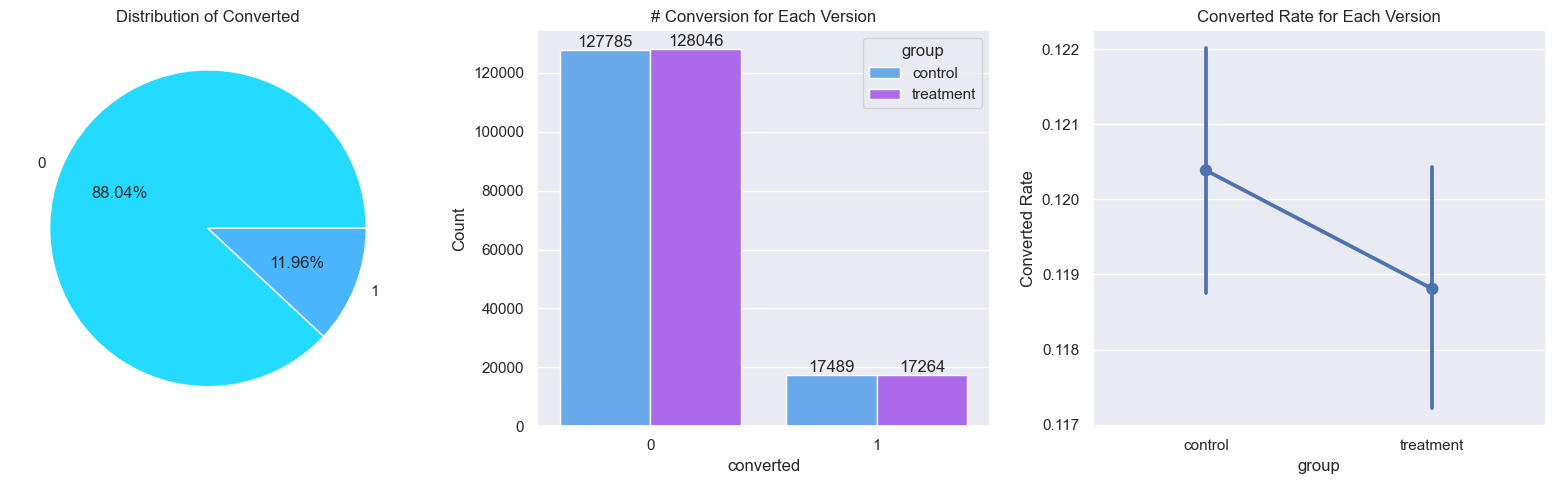

In [70]:
fig, ax = plt.subplots(1,3)

plt.subplot2grid((1,3),(0,0), title='Distribution of Converted')
plt.pie(df_clean.converted.value_counts().values, labels=df_clean.converted.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')

sns.countplot(x="converted", data=df_clean, hue="group", ax=ax[1], palette='cool')
ax[1].set(title="# Conversion for Each Version", ylabel="Count")
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])

sns.pointplot(x="group", y="converted", data=df_clean, ax=ax[2])
ax[2].set(title="Converted Rate for Each Version",ylabel="Converted Rate")

plt.tight_layout()

As you can see from the above figures:

The Conversion number is a discrete metric, with only 0 or 1 value, the sample size of the data is large, so Pearson's chi-square test is much better to be applied.

The conversion rate of the new version is slightly lower than that of the old version, but there is some overlap between the two versions, so the difference doesn't look significant.

# **A/B TESTING**
Hypothesis:

    - H0: old_page == new_page
    - H1: old_page != new_page

In [103]:
import scipy.stats as stats

def ab_testing(feature, control, test, alpha=0.05):
    #contigency table
    table = pd.DataFrame(dict(
        c=control[feature].value_counts(),
        t=test[feature].value_counts()
    )).to_numpy()
    if (len(control)+len(test)) < 1000:
        #Fisher Exact Test
        type_test = 'Fisher Exact'
        result = stats.fisher_exact(table)
        pvalue = result[1]
        if pvalue > alpha: hypothesis = 'Fail to Reject H0'
        if pvalue < alpha: hypothesis = 'Reject H0'
    else:
        #Chi Square Test
        type_test = 'Chi Square'
        result = stats.chi2_contingency(table)
        pvalue = result[1]
        if pvalue > alpha: hypothesis = 'Fail to Reject H0'
        if pvalue < alpha: hypothesis = 'Reject H0'
    return pd.DataFrame(dict(
        type_test=[type_test],
        metric=[feature],
        pvalue=[pvalue],
        hypothesis=[hypothesis],
    ))

In [104]:
ab_testing(feature='converted',control=df_control,test=df_treatment)

,type_test,metric,pvalue,hypothesis
0,Chi Square,converted,0.191822,Fail to Reject H0


# **CONCLUSIONS**
The treatment has no impact.